Excellent, really﻿.
The only real feedback from me is that a bit work on the outine would help. The audience generally has a few minutes of attention. You have to use it efficiently. For example group the code together, group the sections better, etc. Dont waste space on code, except for the theoretical.

 

- Algorithm, problem description OK
- Theoretical aspect and the algorithm script good
- Need a good empirical evaluation plan - more data check benchmark datasets, a few would suffice
- References good
- Conclusion needed (in the final report)

# 605.621 - Foundations of Algorithms

## The Maximal Clique Problem

Sabbir Ahmed

May 11, 2021

# Table of contents

- [Introduction](#introduction)
  - [Background](#background)
  - [Algorithm](#algorithm)
- [Complexity Analysis](#complexity-analysis)
  - [Time complexity](#time-complexity)
  - [Space complexity](#space-complexity)
- [Empirical Analysis](#empirical-analysis)
  - [Data analytics](#data-analytics)
- [Conclusion](#conclusion)
- [References](#references)

## Introduction <a class="anchor" id="introduction"></a>

### Background <a class="anchor" id="background"></a>

According to graph theory, a __graph__ can be defined simply as a set of objects (called __nodes__ or vertices) connected together through __edges__. [\[1\]](#references)

A __clique__ of a graph $G$ is a complete subgraph of $G$ such that every two distinct nodes in the clique are adjacent. A __maximal clique__ is a clique that cannot be extended by including one more adjacent nodes [\[2\]](#references).

Consider the following graph:

In [1]:
import random

# import library for constructing and displaying graphs
import networkx as nx
import numpy as np

seed = 0
random.seed(seed)
np.random.seed(seed)

def draw_graph(G, pos, node_color="0.9"):
    nx.draw(G, pos=pos, node_color=node_color, node_size=500, with_labels=True)

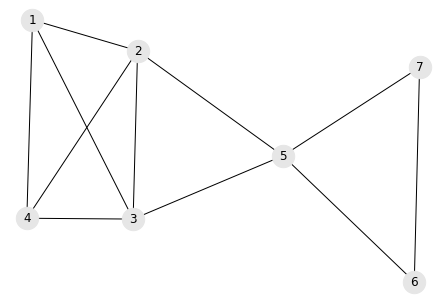

In [2]:
G = nx.Graph()  # instantiate an empty graph
G.add_nodes_from(range(1, 8))  # add 7 nodes
# connect the nodes
G.add_edges_from([
    [1, 2], [1, 3],
    [1, 4], [2, 3],
    [2, 4], [2, 5],
    [3, 4], [3, 5],
    [5, 6], [5, 7],
    [6, 7]
])

# save the x,y coordinates of the graphical representation of the graph to overlay subgraphs in the later cells
pos = nx.spring_layout(G, seed=seed)
# use networkx to draw the graph constructed
draw_graph(G, pos)

In [3]:
print(f"Graph G has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph G has 7 nodes and 11 edges


For convenience, we begin searching for a clique from the less crowded areas of the graph, nodes 5-6-7.

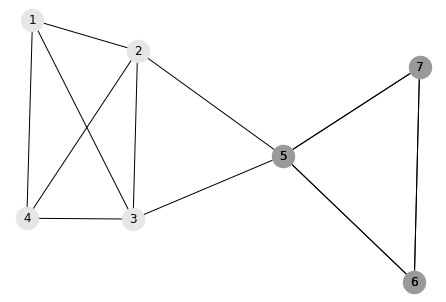

In [4]:
draw_graph(G, pos)
draw_graph(G.subgraph([5, 6, 7]), pos=pos, node_color="0.6")

Those nodes form a closed triangular supgraph and each of the nodes except 5 have two neighbors (2, 3). A __neighbor__ of a node is a node that is connected by at least one edge. The triangular subgraph 5-6-7 is a clique because each of the nodes are neighbors of each other. The clique is maximal because even if vertex 5 has additional neighbors, extending the subgraph to vertex 2, for example, would not make the node neighbors of 6 or 7. The clique is maximal because it cannnot be extended further.

The next set of nodes to observe are the closed triangular subgraph 2-3-5.

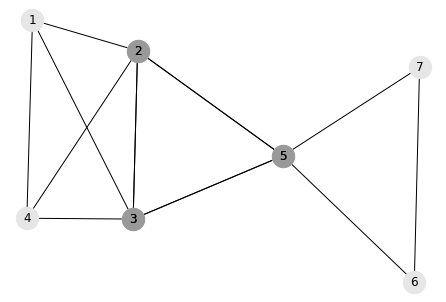

In [5]:
draw_graph(G, pos)
draw_graph(G.subgraph([2, 3, 5]), pos=pos, node_color="0.6")

For the same reasons as 5-6-7, this subgraph cannot be extended with neighbors of certain nodes. Therefore, 2-3-5 is also a maximal clique.

The final set of nodes are 1-2-3-4 that form a closed rectangular subgraph.

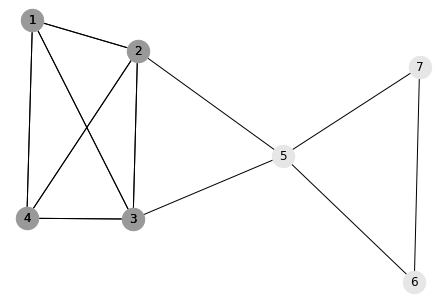

In [6]:
draw_graph(G, pos)
draw_graph(G.subgraph([1, 2, 3, 4]), pos=pos, node_color="0.6")

We observe that each of the nodes are neighbors of each other, i.e. traversing between any two nodes in the subgraph takes a single iteration. This clique is maximal because it cannot be extended further by including other nodes. This maximal clique is also known as the __maximum clique__ of graph $G$ because it contains the maximum number of nodes among all the maximal cliques.

### Algorithm <a class="anchor" id="algorithm"></a>

Finding the maximum number of cliques is a problem that can scale exponentially since there exist graphs with exponentially many maximal cliques. A polynomial time is often not possible if a brute-force approach is taken to find all the cliques. Several algorithms exist to enumerate all the maximal cliques in a graph, including the [Bron–Kerbosch algorithm](https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm) which performs in $O(3^{n/3})$ time, matching the maximum number of cliques possible in an $n$-node graph. [\[3\]](#references)

```
Bron-Kerbosch(R, P, X)
    if P and X are both empty then
        report R as a maximal clique
    for each vertex v in P do
        Bron-Kerbosch(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P = P \ {v}
        X = X ⋃ {v}
```

The cliques have to be stored in memory and preserved through the recursive calls. A list variable can be passed in the recursive functions to store the cliques. An additional variable can also be included to count the number of recursions per algorithm.

In [7]:
class RecursionReporter():

    def __init__(self, N):
        """Helper class to keep track of attributes of the recursive functions"""
        # assign the list of neighbors in the graph to a member variable to
        # avoid passing it every call
        self.N = N

        # list of maximal cliques found
        self.cliques = []

        # number of recursive calls made
        self.num_recursions = 0

    def inc(self):
        """Increment the number of recursive calls made"""
        self.num_recursions += 1

    def append(self, clique):
        """Add maximal clique to the list of cliques"""
        self.cliques.append(clique)

    def report_agg(self):
        """Report the aggregated statistics"""
        print(f"Total number of recursive calls: {self.num_recursions}")
        print(f"Total number of cliques found: {len(self.cliques)}")

    def report(self):
        """Report the aggregated statistics and list out all the cliques found"""
        self.report_agg()
        for clique in self.cliques:
            print(clique)

In [8]:
def bron_kerbosch(R, P, X, reporter):
    """Naive Bron–Kerbosch algorithm"""
    reporter.inc()
    if not P and not X:
        reporter.append(R)

    for v in list(P):
        bron_kerbosch(R | {v}, P & set(reporter.N(v)), X & set(reporter.N(v)), reporter)
        P.remove(v)
        X.add(v)

In [9]:
reporter = RecursionReporter(G.neighbors)
bron_kerbosch(set(), set(G.nodes()), set(), reporter)
reporter.report()

Total number of recursive calls: 26
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


The naive Bron Kerbosch algorithm is however not very efficient with many non-maximal cliques. The algorithm makes a recursive call for every clique, maximal or not. A variation of the algorithm exists with a pivot vertex to more quickly backtrack in branches of the search that contain no maximal cliques.

```
Bron-Kerbosch-Pivot(R, P, X)
    if P and X are both empty then
        report R as a maximal clique
    choose a pivot vertex u in P ⋃ X
    for each vertex v in P \ N(u) do
        Bron-Kerbosch-Pivot(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P := P \ {v}
        X := X ⋃ {v}
```

In [10]:
def _pop(s):
    """Pop from the set `s`

    This utility function is utilized in choosing "any" vertex from a set. In
    this notebook, only unions, intersections and differences of sets are
    inputted. Popping from those sets do not affect the original sets.
    
    Args:
        s <set(int)>: set of integer nodes
        
    Returns:
        e <int>: node popped from set
    """
    for e in s:
        break
    return e

def bron_kerbosch_pivot(R, P, X, reporter):
    """Bron–Kerbosch algorithm with pivot"""
    reporter.inc()
    if not P and not X:
        reporter.append(R)
        return

    # some vertex in P | X
    pivot = _pop(P | X)

    # for every nodes
    for v in list(P - set(reporter.N(pivot))):
        bron_kerbosch_pivot(R | {v}, P & set(reporter.N(v)), X & set(reporter.N(v)), reporter)
        P.remove(v)
        X.add(v)

In [11]:
reporter = RecursionReporter(G.neighbors)
bron_kerbosch_pivot(set(), set(G.nodes()), set(), reporter)
reporter.report()

Total number of recursive calls: 13
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


## Complexity Analysis <a class="anchor" id="complexity-analysis"></a>

For this project, only the version of the Bron Kerbosch algorithm with pivoting will be analyzed. Consider the breakdown of the function with their individual time complexities:

```
def bron_kerbosch_pivot(R, P, X):
    if not P and not X:                     # O(1)
        print(R)                            # O(1)
        return

    pivot = pop(P | X)                      # O(|P|+|X|)

    P1 = P - set(N(pivot))                  # O(|P|)
    P1 = list(P1)                           # O(|P|)
    for v in P1:                            # O(|P|)
        R1 = R | {v}                        # O(|R|)
        P2 = P & set(N(v))                  # O(min(|P|,|N|))
        X1 = X & set(N(v))                  # O(min(|X|,|N|))
        bron_kerbosch_pivot(R1, P2, X1)     # O(1)
        P.remove(v)                         # O(1)
        X.add(v)                            # O(1)
```

### Time complexity <a class="anchor" id="time-complexity"></a>

The depth of the recursion tree increases depending on the number of nodes per each sets $R$, $P$ and $X$. As mentioned earlier, the maximum number of maximal cliques in a graph of $n$ nodes is $3^{n/3}$, which is the worst case runtime of this algorithm.

### Space complexity <a class="anchor" id="space-complexity"></a>

The worst case space complexity of the algorithm is $O(|P|\cdot max(min(|P|,|N|), min(|X|,|N|)))$. Since on average $|P| \approx |X| \approx |N|$, the complexity can be simplified to $O(n^2)$.

## Empirical Analysis <a class="anchor" id="empirical-analysis"></a>

In order to measure the performance of the algorithm, several utility functions are required. We can expand on the `RecursionReporter` class by adding methods to generate random graphs and other statistics.

In [12]:
class GraphGenerator(RecursionReporter):

    def __init__(self, n):
        """Generate a random undirected graph of `n` nodes and `n` < x < `n` * 5 edges and
        provide methods to find all the maximal and maximum cliques.

        Args:
            n <int>: number of nodes for the random graph
        """
        # number of nodes in the graph
        self.n = n

        # generate a random number between n and 5n
        self.e = np.random.randint(self.n, self.n * 5)

        # generate a random graph of n nodes and e edges
        self.G = nx.gnm_random_graph(self.n, self.e)

        # save the neighbor nodes as a member variable
        self.N = self.G.neighbors

        # call the superclass constructor
        super(GraphGenerator, self).__init__(self.N)

    def gen_stats(self):
        """Compute the total number and lengths of maximal and maximum cliques"""
        self.num_cliques = len(self.cliques)
        self.max_clique_len = len(max(self.cliques, key=lambda x: len(x)))
        self.max_cliques = [x for i, x in enumerate(self.cliques) if len(x) == self.max_clique_len]
        self.num_max_cliques = len(self.max_cliques)
        self.rec_nodes_ratio = self.num_recursions / self.n

    def report(self):
        """Report the statistics and list all the cliques found"""
        print(f"Total number of recursive calls: {self.num_recursions}")
        print(f"Number of recursions to nodes ratio: {self.rec_nodes_ratio}\n")
        print(f"Total number of cliques found: {self.num_cliques}")
        print("Maximal cliques found:")
        for clique in self.cliques:
            print(clique)

        print(f"\nLength of the maximum clique(s): {self.max_clique_len}")
        print(f"Number of maximum clique(s) found: {self.num_max_cliques}")
        print("Maximum cliques found:")
        for clique in self.max_cliques:
            print(clique)

Testing out the class constructed:

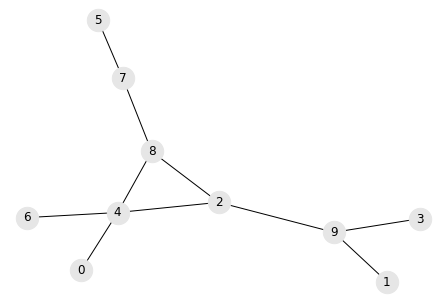

In [13]:
gg = GraphGenerator(10)
nx.draw(gg.G, node_color="0.9", node_size=500, with_labels=True)

In [14]:
bron_kerbosch_pivot(set(), set(gg.G.nodes()), set(), gg)

In [15]:
gg.gen_stats()
gg.report()

Total number of recursive calls: 19
Number of recursions to nodes ratio: 1.9

Total number of cliques found: 8
Maximal cliques found:
{0, 4}
{1, 9}
{8, 2, 4}
{9, 2}
{9, 3}
{5, 7}
{4, 6}
{8, 7}

Length of the maximum clique(s): 3
Number of maximum clique(s) found: 1
Maximum cliques found:
{8, 2, 4}


Now, statistics can be generated on the number of recursions as the size of the graph increases.

In [16]:
%%time
# lists to store graph variables
num_recursions = []
rec_nodes_ratios = []
num_cliques = []
max_clique_len = []
num_max_cliques = []
num_edges = []
num_nodes_list = range(1, 6)
for i in num_nodes_list:

    # scale number of nodes exponentially
    num_nodes = 10**i

    # temporary lists
    _num_recursions = []
    _rec_nodes_ratios = []
    _num_cliques = []
    _max_clique_len = []
    _max_cliques = []
    _num_max_cliques = []
    _num_edges = []

    # generate 10 graphs of `n` nodes
    for _ in range(50):
        # generate a new graph generator
        gg = GraphGenerator(num_nodes)
        bron_kerbosch_pivot(set(), set(gg.G.nodes()), set(), gg)
        gg.gen_stats()

        _max_clique_len.append(gg.max_clique_len)
        _num_max_cliques.append(gg.num_max_cliques)
        _rec_nodes_ratios.append(gg.rec_nodes_ratio)

        # take log10 of exponentially increasing variables
        _num_recursions.append(np.log10(gg.num_recursions))
        _num_cliques.append(np.log10(gg.num_cliques))
        _num_edges.append(np.log10(gg.e))

    num_recursions.append(_num_recursions)
    rec_nodes_ratios.append(_rec_nodes_ratios)
    num_cliques.append(_num_cliques)
    max_clique_len.append(_max_clique_len)
    num_max_cliques.append(_num_max_cliques)
    num_edges.append(_num_edges)

CPU times: user 3min 15s, sys: 1.62 s, total: 3min 16s
Wall time: 3min 16s


Plotting the statistics by first importing the visualization libraries:

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")

Visualizing the log-log relationship between the number of nodes in a graph with the number of recursive calls made by the clique searching algorithm:

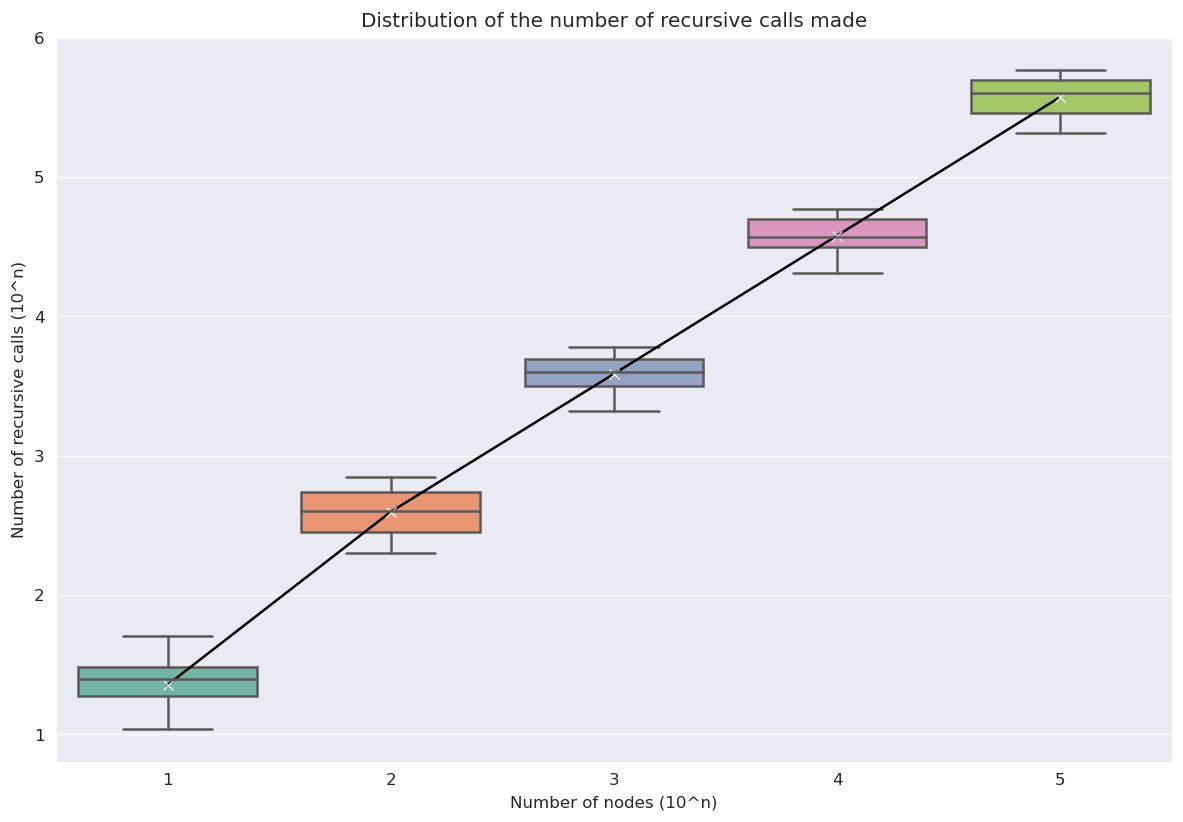

In [18]:
fig = plt.figure(figsize=(12, 8), dpi=120)

# generate boxplots of the log10 of the number of recursive calls
sns.boxplot(data=num_recursions, palette=sns.color_palette("Set2"))
# generate a line plot of the mean of the log10 of the number of recursive calls 
sns.lineplot(data=[np.mean(i) for i in num_recursions], marker="x", color="black")

plt.xlabel("Number of nodes (10^n)")
plt.ylabel("Number of recursive calls (10^n)")
plt.xticks(plt.xticks()[0], num_nodes_list)
plt.title("Distribution of the number of recursive calls made");

It can be observed that there is a linear relationship between the number of nodes in a graph and the number of recursive calls made. 

Computing the ratios of the number of recursive calls to the number of nodes yields interesting results.

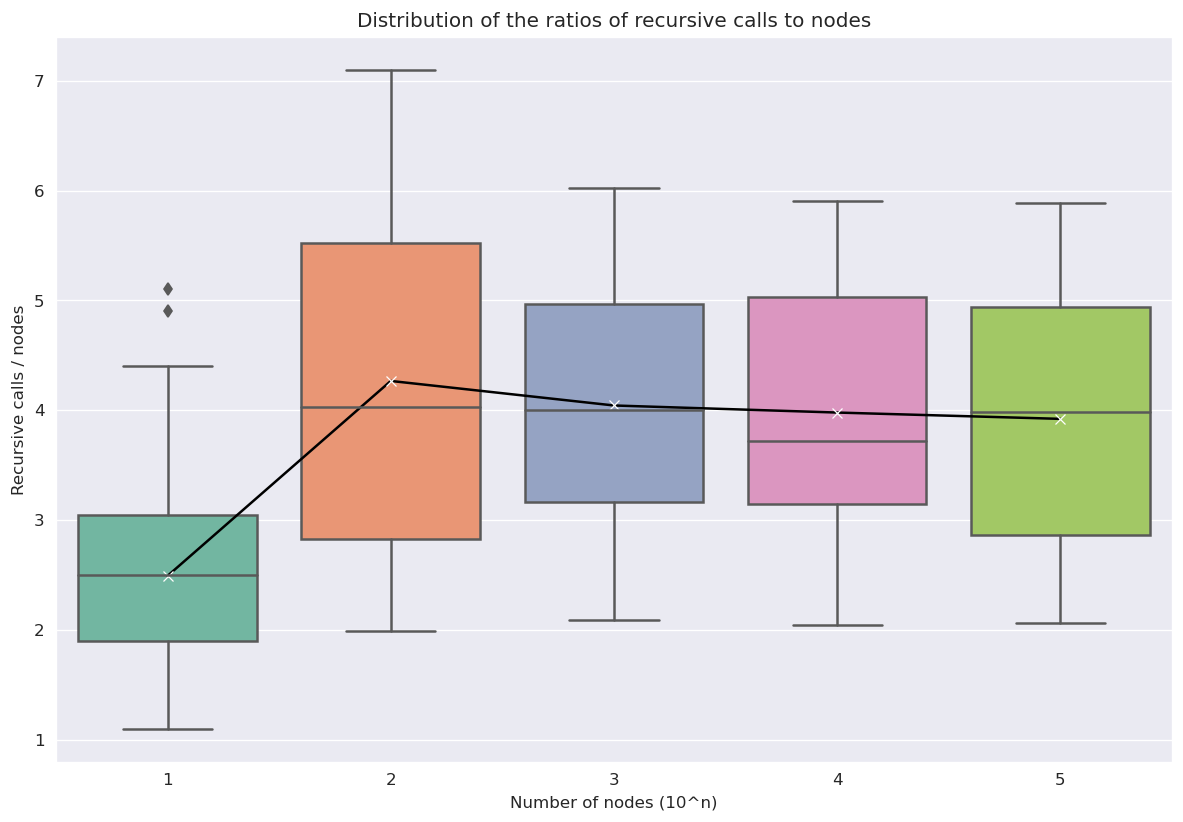

In [19]:
fig = plt.figure(figsize=(12, 8), dpi=120)

# generate boxplots of the log10 of the number of recursive calls
sns.boxplot(data=rec_nodes_ratios, palette=sns.color_palette("Set2"))
# generate a line plot of the mean of the log10 of the number of recursive calls 
sns.lineplot(data=[np.mean(i) for i in rec_nodes_ratios], marker="x", color="black")

plt.xlabel("Number of nodes (10^n)")
plt.ylabel("Recursive calls / nodes")
plt.xticks(plt.xticks()[0], num_nodes_list)
plt.title("Distribution of the ratios of recursive calls to nodes");

Another interesting observation can be made by visualizing the lengths of the maximum cliques of the increasing graph sizes. Obviously, a larger graph is bound to have a larger maximum clique. However, the range of the lengths of the maximum cliques also increase with the number of nodes.

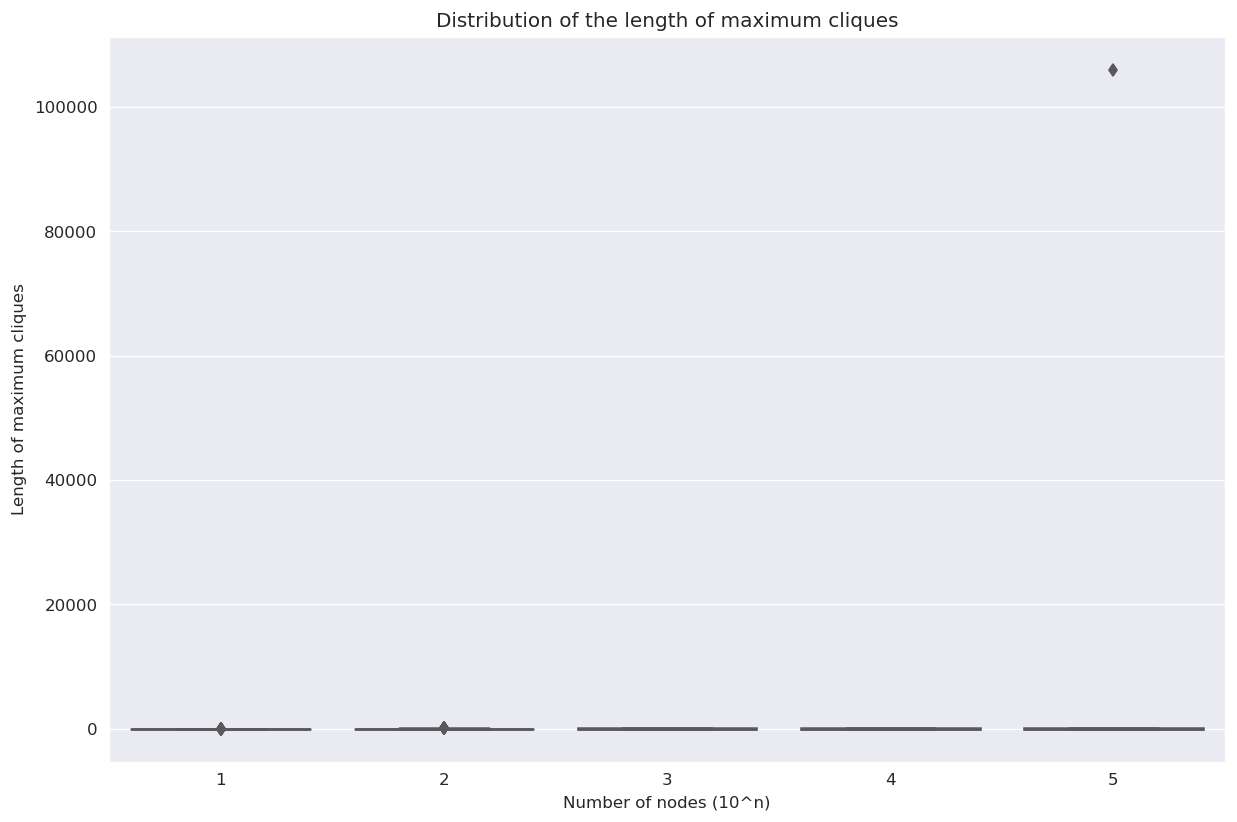

In [21]:
fig = plt.figure(figsize=(12, 8), dpi=120)

# generate boxplots of the lengths of the maximum cliques
sns.boxplot(data=num_max_cliques, palette=sns.color_palette("Set2"))

plt.xlabel("Number of nodes (10^n)")
plt.ylabel("Length of maximum cliques")
plt.xticks(plt.xticks()[0], num_nodes_list)
plt.title("Distribution of the length of maximum cliques");

Several outliers can be observed in the lengths of the maximum cliques. Since the maximum number of cliques possible in a graph of $n$ nodes is $3^(n/3)$, this is not unusual. Listing the outlier values:

In [20]:
from matplotlib.cbook import boxplot_stats
bp_stats = boxplot_stats(num_max_cliques)
for num_nodes, stats in enumerate(bp_stats):
    print(f"{np.power(10, num_nodes + 1)}: {list(stats['fliers'])}")

10: [10, 16, 14, 9, 12, 14]
100: [70, 85, 140, 130, 71, 70]
1000: []
10000: []
100000: [106004]


Plotting the distribution of the lengths of the maximum cliques again, with the outliers removed:

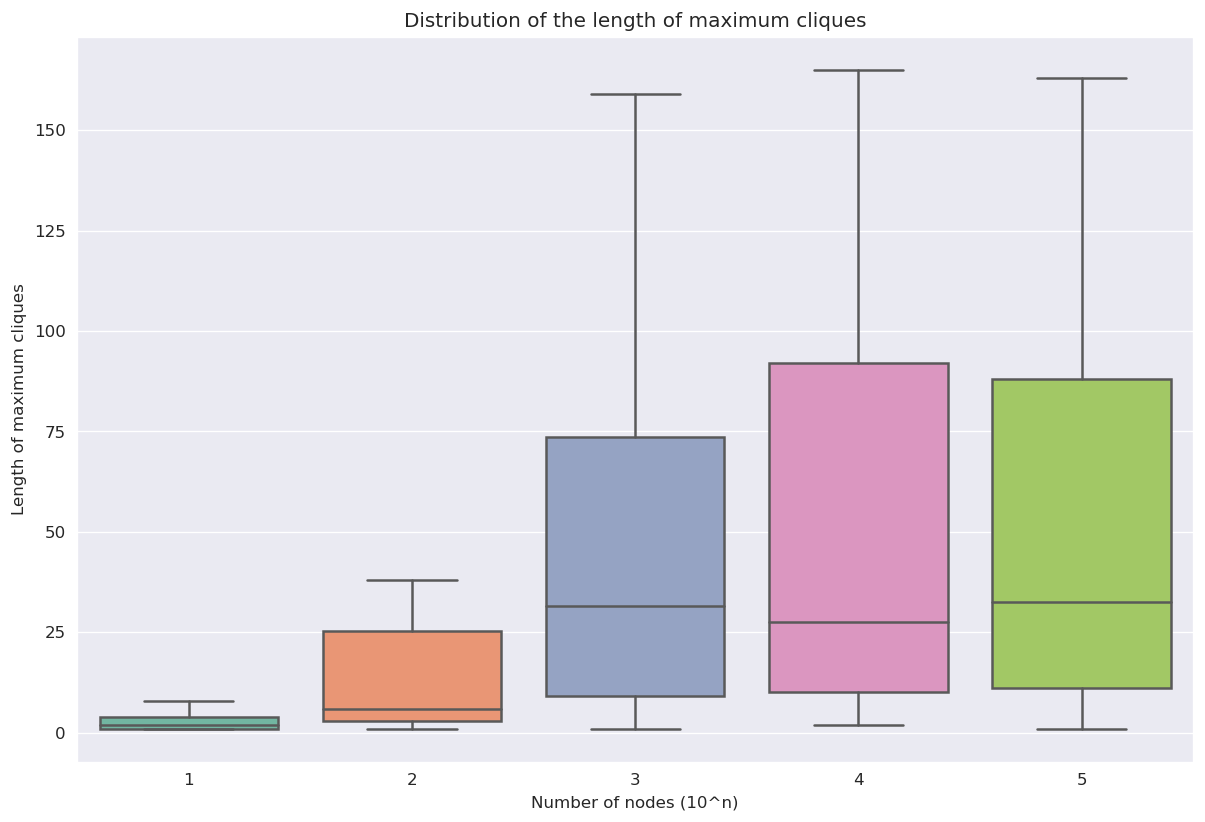

In [22]:
fig = plt.figure(figsize=(12, 8), dpi=120)

# generate boxplots of the lengths of the maximum cliques
sns.boxplot(data=num_max_cliques, palette=sns.color_palette("Set2"), showfliers=False)

plt.xlabel("Number of nodes (10^n)")
plt.ylabel("Length of maximum cliques")
plt.xticks(plt.xticks()[0], num_nodes_list)
plt.title("Distribution of the length of maximum cliques");

## Conclusion

fsdfjhsdbfjsdbf

## References <a class="anchor" id="references"></a>

[1] “Directed and Undirected Graphs.” Directed and Undirected Graphs - MATLAB &amp; Simulink, www.mathworks.com/help/matlab/math/directed-and-undirected-graphs.html.

[2] “Clique.” From Wolfram MathWorld, mathworld.wolfram.com/Clique.html. 

[3] Moon, J., & Moser, L. (1965). On cliques in graphs. Israel Journal of Mathematics, 3, 23-28.